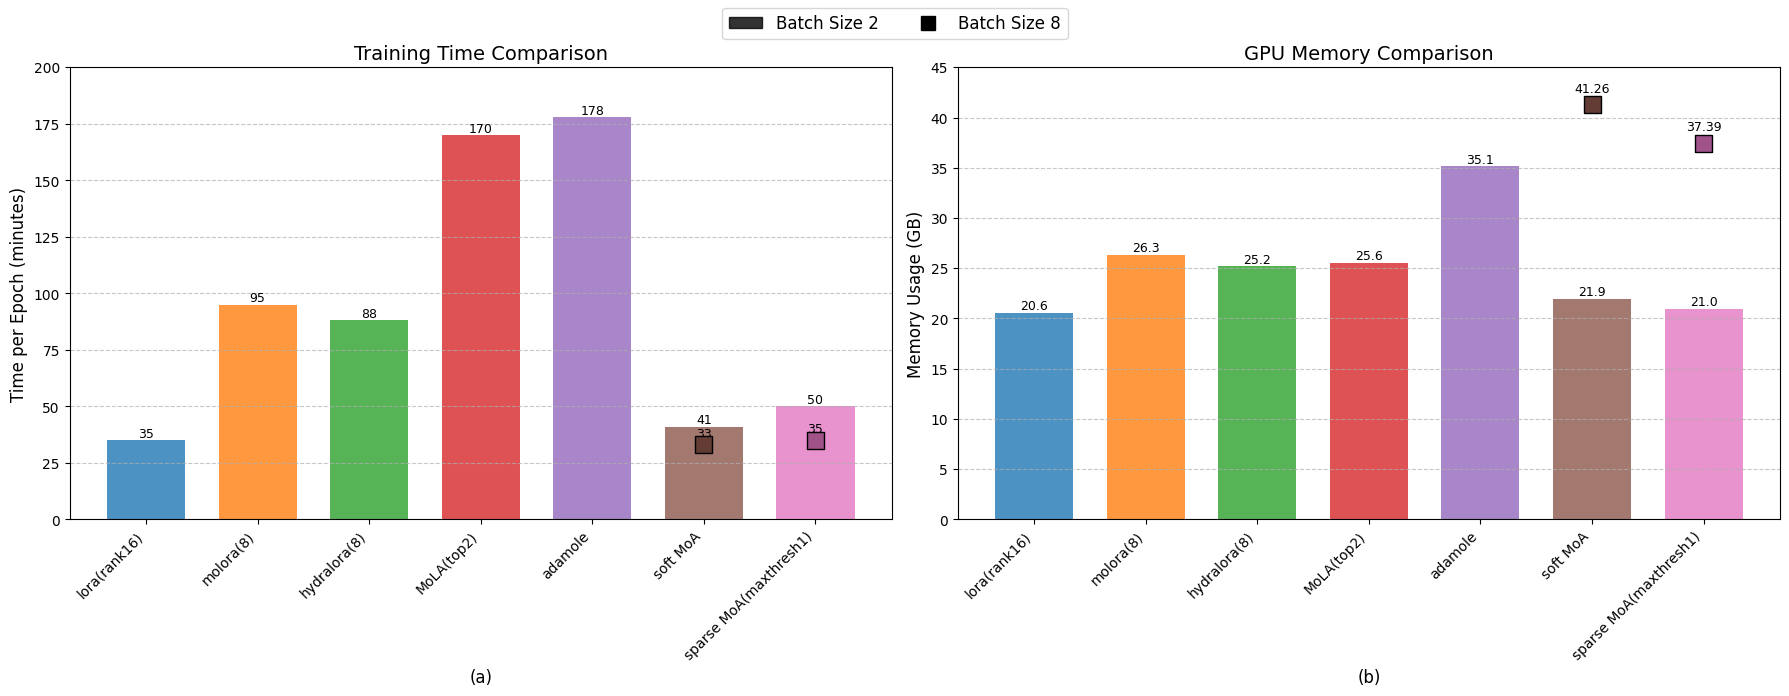

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

# --------------------------
# 数据准备
# --------------------------
models = [
    'lora(rank16)', 'molora(8)', 'hydralora(8)', 
    'MoLA(top2)', 'adamole', 'soft MoA', 'sparse MoA(maxthresh1)'
]

# Batch Size 2 数据
time_bs2 = [35, 95, 88, 170, 178, 41, 50]
mem_bs2 = [20.57, 26.31, 25.19, 25.55, 35.14, 21.93, 20.98]

# Batch Size 8 数据（仅最后两个模型）
time_bs8 = [None, None, None, None, None, 33, 35]
mem_bs8 = [None, None, None, None, None, 41.26, 37.39]

# --------------------------
# 颜色处理函数
# --------------------------
def darken_color(color, factor=0.7):
    """将颜色变暗"""
    hsv = rgb_to_hsv(color[:3])
    hsv[2] = max(0, hsv[2] * factor)  # 降低明度
    return hsv_to_rgb(hsv)

# 生成颜色方案
base_colors = plt.cm.tab10.colors[:len(models)]
dark_colors = [darken_color(c) for c in base_colors]

# --------------------------
# 创建画布和子图
# --------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), sharex=True)
x = np.arange(len(models))
width = 0.7  # 柱状图宽度

# --------------------------
# 子图1：训练时间对比
# --------------------------
# 绘制BS=2柱状图
time_bars = ax1.bar(x, time_bs2, width, 
                   color=base_colors, alpha=0.8,
                   label='BS=2')

# 绘制BS=8散点（最后两个模型）
bs8_time_idx = [5, 6]  # soft和sparse的位置
ax1.scatter(bs8_time_idx, [33, 35], s=150,
           color=[dark_colors[i] for i in bs8_time_idx],
           edgecolor='black', zorder=10,
           marker='s', label='BS=8')

# 装饰子图1
ax1.set_title('Training Time Comparison', fontsize=14)
ax1.set_ylabel('Time per Epoch (minutes)', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_ylim(0, 200)

# --------------------------
# 子图2：显存占用对比
# --------------------------
# 绘制BS=2柱状图
mem_bars = ax2.bar(x, mem_bs2, width,
                 color=base_colors, alpha=0.8,
                 label='BS=2')

# 绘制BS=8散点
bs8_mem_idx = [5, 6]
ax2.scatter(bs8_mem_idx, [41.26, 37.39], s=150,
           color=[dark_colors[i] for i in bs8_mem_idx],
           edgecolor='black', zorder=10,
           marker='s', label='BS=8')

# 装饰子图2
ax2.set_title('GPU Memory Comparison', fontsize=14)
ax2.set_ylabel('Memory Usage (GB)', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, 45)

# --------------------------
# 公共设置
# --------------------------
# X轴设置
for ax in [ax1, ax2]:
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax1.set_xlabel('(a)', fontsize=12)
ax2.set_xlabel('(b)', fontsize=12)

# 添加数值标签
def add_value_labels(ax, values, offset=0.03):
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + offset,
                f'{height:.1f}' if isinstance(height, float) else f'{height}',
                ha='center', va='bottom', fontsize=9)

add_value_labels(ax1, time_bs2)
add_value_labels(ax2, mem_bs2)

# 添加数据点标签
for ax, values, positions in [(ax1, [33, 35], bs8_time_idx), 
                             (ax2, [41.26, 37.39], bs8_mem_idx)]:
    for x_pos, val in zip(positions, values):
        ax.text(x_pos, val + (2 if ax == ax1 else 1), f'{val}',
                ha='center', va='bottom', fontsize=9)

# 创建统一图例
handles = [plt.Rectangle((0,0),1,1, color='black', alpha=0.8),
          plt.Line2D([], [], color='black', marker='s', linestyle='None',
                    markersize=10, markeredgecolor='black')]
labels = ['Batch Size 2', 'Batch Size 8']
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # 调整布局
plt.show()

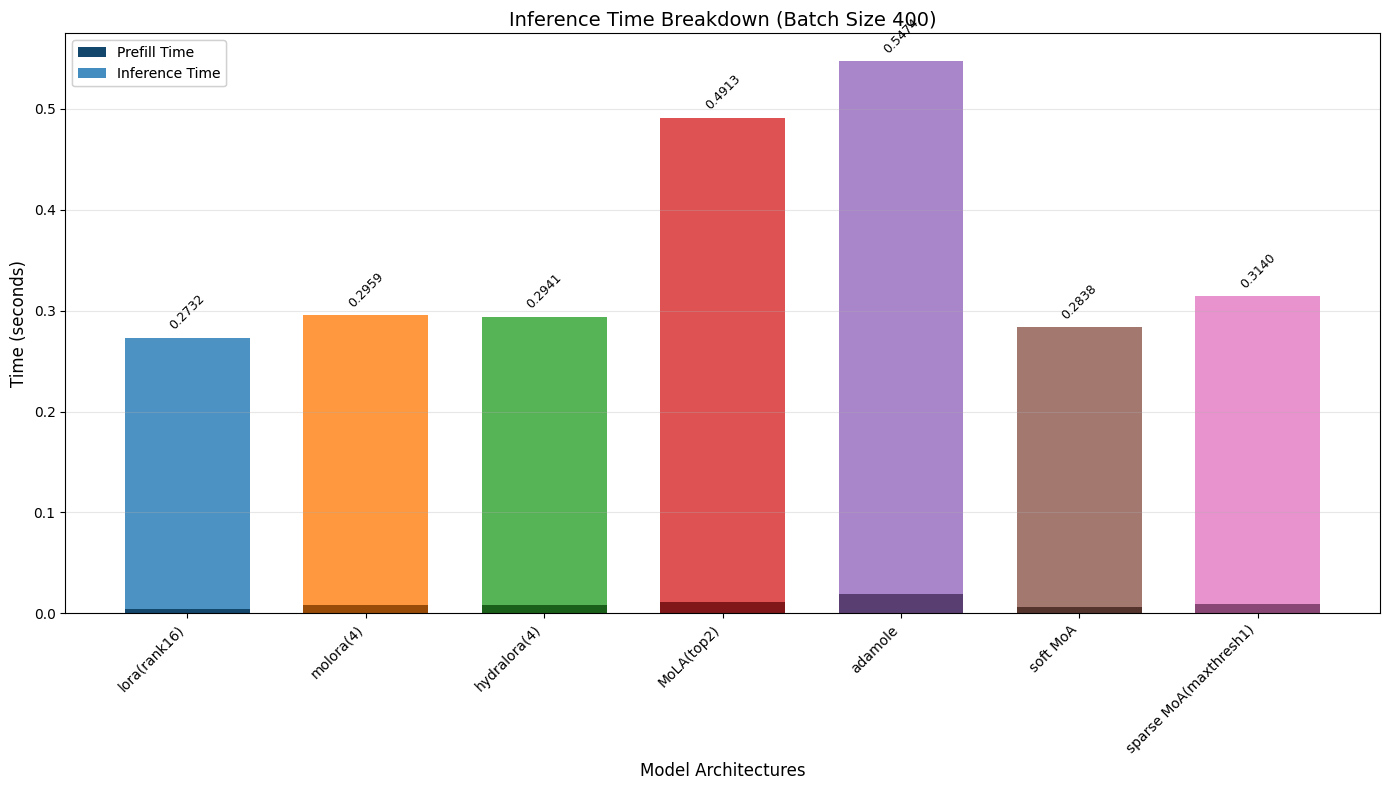

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

# 数据准备
models = ['lora(rank16)', 'molora(4)', 'hydralora(4)', 
         'MoLA(top2)', 'adamole', 'soft MoA', 'sparse MoA(maxthresh1)']
total_times = [0.2732, 0.2959, 0.2941, 0.4913, 0.5474, 0.2838, 0.3140]
inference_times = [0.2685, 0.2874, 0.2856, 0.4799, 0.5280, 0.2780, 0.3050]
prefill_times = [t - i for t, i in zip(total_times, inference_times)]

# 颜色生成函数
def darken_color(color, factor=0.6):
    """通过降低明度加深颜色"""
    hsv = rgb_to_hsv(color[:3])
    hsv[2] = max(0, hsv[2] * factor)
    return hsv_to_rgb(hsv)

# 生成颜色方案
base_colors = plt.cm.tab10.colors[:len(models)]
dark_colors = [darken_color(c) for c in base_colors]

# 创建画布
plt.figure(figsize=(14, 8))
ax = plt.gca()

# 绘制堆叠柱状图
x = np.arange(len(models))
bar_width = 0.7

# 先绘制prefill部分（底部）
pre_bars = ax.bar(x, prefill_times, bar_width, 
                 color=dark_colors, label='Prefill Time')

# 再绘制inference部分（叠加在上方）
inf_bars = ax.bar(x, inference_times, bar_width, 
                 bottom=prefill_times, 
                 color=base_colors, alpha=0.8,
                 label='Inference Time')

# 添加总时间标签
for i, (rect, total) in enumerate(zip(inf_bars, total_times)):
    height = rect.get_height() + rect.get_y()
    ax.text(rect.get_x() + rect.get_width()/2., height + 0.005,
            f'{total:.4f}', ha='center', va='bottom',
            fontsize=9, rotation=45)

# 图表装饰
plt.title('Inference Time Breakdown (Batch Size 400)', fontsize=14)
plt.xlabel('Model Architectures', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.xticks(x, models, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# 创建双图例
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=base_colors[0], label='Models Color Legend'),
    Patch(facecolor=dark_colors[0], label='Prefill Time'),
    Patch(facecolor=base_colors[0], alpha=0.8, label='Inference Time')
]

# 添加颜色图例
leg1 = ax.legend(handles=legend_elements[1:], loc='upper left')

# 添加模型颜色图例
# model_legends = [Patch(color=c, label=m) for c, m in zip(base_colors, models)]
# leg2 = ax.legend(handles=model_legends, 
#                 loc='upper right', 
#                 ncol=2, 
#                 fontsize=9,
#                 title="Model Color Mapping")

# 添加双图例
ax.add_artist(leg1)
# ax.add_artist(leg2)

plt.tight_layout()
plt.show()

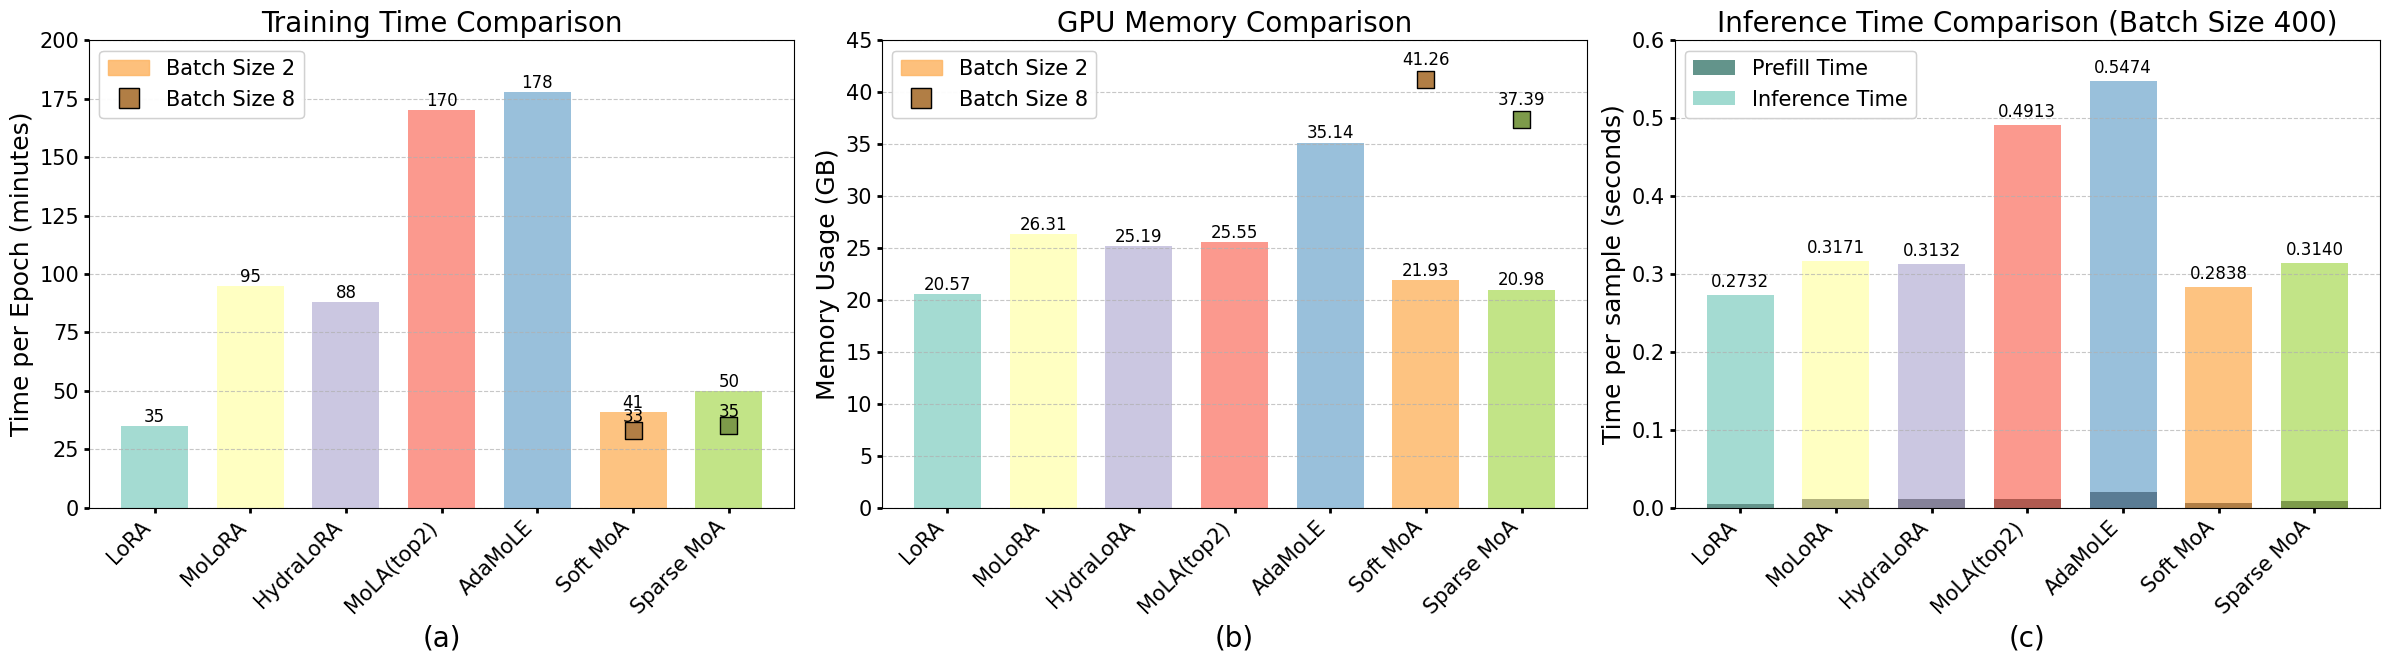

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

# --------------------------
# 数据准备
# --------------------------
models = [
    'LoRA', 'MoLoRA', 'HydraLoRA', 
    'MoLA(top2)', 'AdaMoLE', 'Soft MoA', 'Sparse MoA'
]

# Batch Size 2 数据
time_bs2 = [35, 95, 88, 170, 178, 41, 50]
mem_bs2 = [20.57, 26.31, 25.19, 25.55, 35.14, 21.93, 20.98]

# Batch Size 8 数据（仅最后两个模型）
time_bs8 = [None, None, None, None, None, 33, 35]
mem_bs8 = [None, None, None, None, None, 41.26, 37.39]

# 推理时间
total_times = [0.2732, 0.3171, 0.3132, 0.4913, 0.5474, 0.2838, 0.3140]
inference_times = [0.2685, 0.3057, 0.3019, 0.4799, 0.5280, 0.2780, 0.3050]
prefill_times = [t - i for t, i in zip(total_times, inference_times)]


# font size
title_font_size = 20
y_label_font_size = 18

# --------------------------
# 颜色处理函数
# --------------------------
def darken_color(color, factor=0.7):
    """将颜色变暗"""
    hsv = rgb_to_hsv(color[:3])
    hsv[2] = max(0, hsv[2] * factor)  # 降低明度
    return hsv_to_rgb(hsv)

# 生成颜色方案
# base_colors = plt.cm.tab10.colors[:len(models)]
base_colors = plt.cm.Set3.colors[:len(models)]
# base_colors = plt.cm.Pastel2.colors[:len(models)]
dark_colors = [darken_color(c) for c in base_colors]

# --------------------------
# 创建画布和子图
# --------------------------
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 7), sharex=True)
x = np.arange(len(models))
width = 0.7  # 柱状图宽度

# --------------------------
# 子图1：训练时间对比
# --------------------------
# 绘制BS=2柱状图
time_bars = ax1.bar(x, time_bs2, width, 
                   color=base_colors, alpha=0.8,
                   label='Batch Size 2')

# 绘制BS=8散点（最后两个模型）
bs8_time_idx = [5, 6]  # soft和sparse的位置
ax1.scatter(bs8_time_idx, [33, 35], s=150,
           color=[dark_colors[i] for i in bs8_time_idx],
           edgecolor='black', zorder=10,
           marker='s', label='Batch Size 8')

# 装饰子图1
ax1.set_title('Training Time Comparison', fontsize=title_font_size)
ax1.set_ylabel('Time per Epoch (minutes)', fontsize=y_label_font_size)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_ylim(0, 200)

# --------------------------
# 子图2：显存占用对比
# --------------------------
# 绘制BS=2柱状图
mem_bars = ax2.bar(x, mem_bs2, width,
                 color=base_colors, alpha=0.8,
                 label='Batch Size 2')

# 绘制BS=8散点
bs8_mem_idx = [5, 6]
ax2.scatter(bs8_mem_idx, [41.26, 37.39], s=150,
           color=[dark_colors[i] for i in bs8_mem_idx],
           edgecolor='black', zorder=10,
           marker='s', label='Batch Size 8')

# 装饰子图2
ax2.set_title('GPU Memory Comparison', fontsize=title_font_size)
ax2.set_ylabel('Memory Usage (GB)', fontsize=y_label_font_size)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, 45)


# ax1 2 公共设置
# 添加数值标签
def add_value_labels(ax, values, offset=0.03):
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + offset,
                f'{height:.2f}' if isinstance(height, float) else f'{height}',
                ha='center', va='bottom', fontsize=12)

add_value_labels(ax1, time_bs2)
add_value_labels(ax2, mem_bs2)

# bs8 添加数据点标签
for ax, values, positions in [(ax1, [33, 35], bs8_time_idx), 
                             (ax2, [41.26, 37.39], bs8_mem_idx)]:
    for x_pos, val in zip(positions, values):
        ax.text(x_pos, val + (2 if ax == ax1 else 1), f'{val}',
                ha='center', va='bottom', fontsize=12)

# 创建统一图例
handles = [plt.Rectangle((0,0),1,1, color=base_colors[-2], alpha=0.8),
          plt.Line2D([], [], color=dark_colors[-2], marker='s', linestyle='None',
                    markersize=15, markeredgecolor='black')]
labels = ['Batch Size 2', 'Batch Size 8']
# 统一画图例
# fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=12)
leg_ax1 = ax1.legend(handles=handles, labels=labels, loc='upper left', fontsize=15)
ax1.add_artist(leg_ax1)
leg_ax2 = ax2.legend(handles=handles, labels=labels,  loc='upper left', fontsize=15)
ax2.add_artist(leg_ax2)

# --------------------------
# 子图3：推理时间占比
# --------------------------
# 绘制prefill inference 堆叠柱状图

# 先绘制prefill部分（底部）
pre_bars = ax3.bar(x, prefill_times, width, 
                 color=dark_colors, label='Prefill Time')

# 再绘制inference部分（叠加在上方）
inf_bars = ax3.bar(x, inference_times, width, 
                 bottom=prefill_times, 
                 color=base_colors, alpha=0.8,
                 label='Inference Time')

# 添加总时间标签
for i, (rect, total) in enumerate(zip(inf_bars, total_times)):
    height = rect.get_height() + rect.get_y()
    ax3.text(rect.get_x() + rect.get_width()/2., height + 0.005,
            f'{total:.4f}', ha='center', va='bottom',
            fontsize=12, )
# 图表装饰
ax3.set_title('Inference Time Comparison (Batch Size 400)', fontsize=title_font_size)
ax3.set_ylabel('Time per sample (seconds)', fontsize=y_label_font_size)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.set_ylim(0, 0.6)

# 创建双图例
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=base_colors[0], label='Models Color Legend'),
    Patch(facecolor=dark_colors[0], label='Prefill Time'),
    Patch(facecolor=base_colors[0], alpha=0.8, label='Inference Time')
]

# 添加颜色图例
leg1 = ax3.legend(handles=legend_elements[1:], loc='upper left',fontsize=15)

# 添加模型颜色图例
# model_legends = [Patch(color=c, label=m) for c, m in zip(base_colors, models)]
# leg2 = ax3.legend(handles=model_legends, 
#                 loc='upper right', 
#                 ncol=2, 
#                 fontsize=9,
#                 title="Model Color Mapping")

# 添加双图例
ax3.add_artist(leg1)
# ax.add_artist(leg2)

# --------------------------
# 公共设置
# --------------------------
# X轴设置
for ax in [ax1, ax2, ax3]:
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right', fontsize=15)
    # ax.set_yticklabels(fontsize=15)
    ax.tick_params(axis='both',  width=2, labelsize=15)
ax1.set_xlabel('(a)', fontsize=20)
ax2.set_xlabel('(b)', fontsize=20)
ax3.set_xlabel('(c)', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # 调整布局
plt.savefig('time_memory.pdf', bbox_inches='tight', dpi=350)
plt.show()

In [5]:
base_colors = plt.cm.Set3.colors[:len(models)]

In [6]:
base_colors

((0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529))